In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
seed=9999
plt.style.use("ggplot")
%matplotlib inline

from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import itertools
from collections import Counter

In [2]:
#read data
purchase=pd.read_csv("/Users/siyang/Downloads/Whole_Foods_Transaction_Data.csv")

In [6]:
#discover data structure
print(purchase.shape)

(250000, 8)


In [7]:
purchase.head()

,transaction_id,product_id,reordered,product_name,aisle_id,department_id,department,aisle
0,10,26842,0,Boneless Beef Sirloin Steak,122,12,meat seafood,meat counter
1,10,1529,0,"Parsley, Italian (Flat), New England Grown",16,4,produce,fresh herbs
2,10,31717,0,Organic Cilantro,16,4,produce,fresh herbs
3,10,21137,1,Organic Strawberries,24,4,produce,fresh fruits
4,10,24852,1,Banana,24,4,produce,fresh fruits


In [11]:
print ("Number of distinct aisle: {}".format(len(purchase['aisle_id'].unique())))
print ("Number of distinct department: {}".format(len(purchase['department_id'].unique())))
print ("Number of distinct product: {}".format(len(purchase['product_id'].unique())))

Number of distinct aisle: 134
Number of distinct department: 21
Number of distinct product: 23323


In [12]:
def count_item(user_info):
    item=user_info['aisle']
    return pd.Series(Counter(aisle for aisle in item))

In [13]:
#Count the number of each aisle that a particular user bought
user_item_counts=purchase.groupby('transaction_id').apply(count_item).unstack(fill_value=0)
user_item_counts.head()

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
transaction_id,,,,,,,,,,,,,,,,,,,,,
10,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
101,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#Normalize data
A=normalize(user_item_counts.values,axis=0)
item_item_similarity=pd.DataFrame(A.T.dot(A),index=user_item_counts.columns,columns=user_item_counts.columns)
item_item_similarity.head()

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
air fresheners candles,1.000000,0.015800,0.000000,0.000000,0.000571,0.007945,0.027721,0.065616,0.040921,0.004320,...,0.017481,0.019461,0.014519,0.026990,0.007745,0.047416,0.031194,0.031062,0.013148,0.022401
asian foods,0.015800,1.000000,0.000000,0.002741,0.026177,0.013598,0.086924,0.014975,0.014008,0.003697,...,0.102193,0.061069,0.108722,0.081921,0.010605,0.013280,0.037375,0.071775,0.007501,0.103871
baby accessories,0.000000,0.000000,1.000000,0.015811,0.060855,0.007845,0.006569,0.017277,0.020203,0.000000,...,0.007967,0.010676,0.014336,0.010660,0.000000,0.008513,0.036962,0.025559,0.000000,0.025738
baby bath body care,0.000000,0.002741,0.015811,1.000000,0.021382,0.006202,0.008656,0.006829,0.000000,0.000000,...,0.025193,0.005064,0.011334,0.011237,0.018137,0.006730,0.024351,0.019196,0.000000,0.027978
baby food formula,0.000571,0.026177,0.060855,0.021382,1.000000,0.006188,0.042445,0.009735,0.004554,0.000961,...,0.053719,0.023220,0.025648,0.043248,0.037057,0.025902,0.027076,0.072874,0.005852,0.139862


In [16]:
#Transform data by PCA
pca=PCA()
item_rotated=pca.fit_transform(item_item_similarity)
item_rotated=pd.DataFrame(item_rotated,index=item_item_similarity.index,columns=["pc{}".format(x+1) for x in range(item_item_similarity.shape[0])])
item_rotated.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc125,pc126,pc127,pc128,pc129,pc130,pc131,pc132,pc133,pc134
air fresheners candles,-0.448866,-0.025636,0.234278,-0.013443,0.002361,-0.151801,-0.005137,0.108516,0.004937,-0.052200,...,-0.002258,0.003034,0.011697,0.008197,0.002008,0.016784,0.001127,-0.002275,0.003505,1.836865e-16
asian foods,0.133782,0.207351,-0.039384,-0.133610,-0.025257,-0.198956,0.162779,-0.000515,-0.014260,-0.020595,...,-0.028938,0.036977,-0.041287,-0.032908,-0.028452,-0.035845,0.024227,-0.005862,-0.012095,1.836865e-16
baby accessories,-0.518465,0.070096,-0.067368,-0.085878,-0.122336,0.282072,-0.075031,-0.138210,0.059867,-0.145300,...,0.003336,0.027845,-0.001137,0.010559,-0.026672,-0.013017,-0.012701,-0.003450,0.000931,1.836865e-16
baby bath body care,-0.489222,0.032569,-0.001880,-0.055948,-0.113521,0.095216,0.028781,-0.024412,0.070515,0.198198,...,0.001392,0.003547,-0.013271,0.010233,-0.004957,0.012985,-0.002730,0.000209,-0.001562,1.836865e-16
baby food formula,-0.017392,-0.040658,-0.073933,-0.014470,-0.123011,0.347964,-0.048768,-0.224095,0.117089,0.054877,...,0.044692,-0.030570,0.033555,0.046122,0.020421,0.001067,-0.003822,0.004805,0.003772,1.836865e-16


Text(0,0.5,'cumulative explained variance')

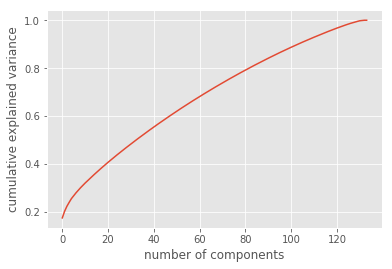

In [17]:
#Show the cumulative explained variance ratio as a function of the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [22]:
def select_k(n_components,df):
    df=df.iloc[:,0:n_components]
    inertias=[]
    silhouettes=[]
    for k in range(2,51):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(df)
        
        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(df,kmeans.predict(df)))
    
    fig=plt.figure(figsize=(10,4))
    fig.add_subplot(1,2,1)
    plt.plot(range(2,51),inertias)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Sum of Squared Distance")
    
    fig.add_subplot(1,2,2)
    plt.plot(range(2,51),silhouettes)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")

In [23]:
def cluster(k,pc,df):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df.iloc[:,0:pc])
    
    grps=df.groupby(kmeans.labels_)
    for label,grp in grps:
        print ("*********** Label [{}] ***********".format(label))
        names=grp.index
        for index,name in enumerate(names):
            print ("\t<{}> {}".format(index+1,name))

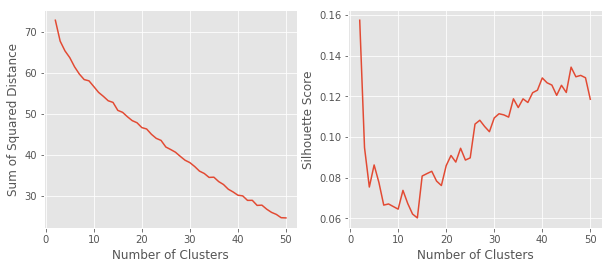

In [20]:
#Choose suitable k by looking at Sum of Squared Distance and silhouette score
select_k(n_components=50,df=item_rotated)

In [24]:
#Show the result of Clustering
cluster(k=40,pc=50,df=item_rotated)

*********** Label [0] ***********
	<1> grains rice dried goods
	<2> honeys syrups nectars
	<3> hot cereal pancake mixes
	<4> poultry counter
*********** Label [1] ***********
	<1> energy sports drinks
	<2> mint gum
	<3> protein meal replacements
*********** Label [2] ***********
	<1> asian foods
	<2> buns rolls
	<3> canned meat seafood
	<4> condiments
	<5> marinades meat preparation
	<6> pickled goods olives
	<7> salad dressing toppings
*********** Label [3] ***********
	<1> fresh fruits
	<2> fresh vegetables
	<3> packaged vegetables fruits
*********** Label [4] ***********
	<1> air fresheners candles
	<2> muscles joints pain relief
*********** Label [5] ***********
	<1> coffee
	<2> cream
	<3> juice nectars
	<4> refrigerated
	<5> soft drinks
	<6> tea
	<7> water seltzer sparkling water
*********** Label [6] ***********
	<1> body lotions soap
	<2> cleaning products
	<3> dish detergents
	<4> laundry
	<5> paper goods
*********** Label [7] ***********
	<1> prepared meals
	<2> prepared soups